In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population-data-1960-2020/world_pop.csv


In [2]:
df = pd.read_csv('/kaggle/input/world-population-data-1960-2020/world_pop.csv')

# Оценка и подготовка данных

In [3]:
df

,Unnamed: 0,country,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,1,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,30117411,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
1,2,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2905195,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837743.0
2,3,Algeria,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,12902626.0,13275020.0,...,36661438,37383899.0,38140135.0,38923688.0,39728020.0,40551398.0,41389174.0,42228415.0,43053054.0,43851043.0
3,4,American Samoa,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,24473.0,25235.0,...,55755,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0
4,5,Andorra,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,20760.0,...,83748,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,212,Virgin Islands (U.S.),32500.0,34300.0,35000.0,39800.0,40800.0,43500.0,46200.0,49100.0,...,108290,108188.0,108041.0,107882.0,107712.0,107516.0,107281.0,107001.0,106669.0,106290.0
212,213,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3882986,3979998.0,4076708.0,4173398.0,4270092.0,4367088.0,4454805.0,4569087.0,4685306.0,4803269.0
213,214,"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,...,23807586,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
214,215,Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,...,14023199,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  216 non-null    int64  
 1   country     216 non-null    object 
 2   year_1960   215 non-null    float64
 3   year_1961   215 non-null    float64
 4   year_1962   215 non-null    float64
 5   year_1963   215 non-null    float64
 6   year_1964   215 non-null    float64
 7   year_1965   215 non-null    float64
 8   year_1966   215 non-null    float64
 9   year_1967   215 non-null    float64
 10  year_1968   215 non-null    float64
 11  year_1969   215 non-null    float64
 12  year_1970   215 non-null    float64
 13  year_1971   215 non-null    float64
 14  year_1972   215 non-null    float64
 15  year_1973   215 non-null    float64
 16  year_1974   215 non-null    float64
 17  year_1975   215 non-null    float64
 18  year_1976   215 non-null    float64
 19  year_1977   215 non-null    f

In [5]:
# Удалим ненужный столбец
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Переводим все значения в целые числа (ведь не может быть 0.5 человека)
for col in df.columns[1:]:
    df[col] = df[col].astype('Int64')    

# Заполняем пропущенные значения в данных

In [7]:
null_data = df[df.isnull().any(axis=1)]
null_data

,country,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
60,Eritrea,1007586,1033320,1060489,1088859,1118152,1148188,1178875,1210304,1242633,...,3213969,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
105,Kuwait,269026,300581,337346,378756,423900,472032,523169,577164,632911,...,3168054,3348852,3526382,3690939,3835588,3956862,4056102,4137314,4207077,4270563
212,West Bank and Gaza,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,3882986,3979998,4076708,4173398,4270092,4367088,4454805,4569087,4685306,4803269


In [8]:
# Просматриваем в каких ячейках (каких годах) отсутствуют значения численности начеления для каждой стораны
NaN_years = {country : [] for country in null_data['country'].index}

for cntry in null_data['country'].index:
    print('\nFor {}:'.format(null_data['country'][cntry]))
    for col in null_data.columns[1:]:
        if pd.isna(null_data[col][cntry]):
            print('{} - {}'.format(col, null_data[col][cntry]))
            NaN_years[cntry].append(col)


For Eritrea:
year_2012 - <NA>
year_2013 - <NA>
year_2014 - <NA>
year_2015 - <NA>
year_2016 - <NA>
year_2017 - <NA>
year_2018 - <NA>
year_2019 - <NA>
year_2020 - <NA>

For Kuwait:
year_1992 - <NA>
year_1993 - <NA>
year_1994 - <NA>

For West Bank and Gaza:
year_1960 - <NA>
year_1961 - <NA>
year_1962 - <NA>
year_1963 - <NA>
year_1964 - <NA>
year_1965 - <NA>
year_1966 - <NA>
year_1967 - <NA>
year_1968 - <NA>
year_1969 - <NA>
year_1970 - <NA>
year_1971 - <NA>
year_1972 - <NA>
year_1973 - <NA>
year_1974 - <NA>
year_1975 - <NA>
year_1976 - <NA>
year_1977 - <NA>
year_1978 - <NA>
year_1979 - <NA>
year_1980 - <NA>
year_1981 - <NA>
year_1982 - <NA>
year_1983 - <NA>
year_1984 - <NA>
year_1985 - <NA>
year_1986 - <NA>
year_1987 - <NA>
year_1988 - <NA>
year_1989 - <NA>


In [9]:
# Заменяем пропущенные значения на 0
df = df.fillna(0)
null_data = null_data.fillna(0)

In [10]:
# Население Eritrea с 2012 по 2020 годы (взято с сайта https://countrymeters.info/ru/Eritrea)
Eritrea_population = [3232135, 3265907, 3296572, 3327260, 3359780, 3394875, 3433009, 3475139, 3521907]
Kuwait_population = [1971536, 1841941, 1715490]
# West_Bank_and_Gaza - "в простонароде" Палестина
West_Bank_and_Gaza_population = [1058783, 1083148, 1112795, 1144115, 1170708, 1186676, 1188149, 1175282, 1153924, 1134233, 1126501, 1136555, 1164472, 1206091, 1254167, 1301368,
                                 1343820, 1382020, 1417700, 1453214, 1491036, 1532632, 1577765, 1626146, 1677511, 1731900, 1788997, 1849119, 1913245, 1983402] 

In [11]:
# Заполняем пропущенные данные в Dataframe
i_1 = 0
i_2 = 0
i_3 = 0
for cntry in null_data['country'].index:  # берем строки, где пропущены данные
    for col in df.columns:  # берем колонки в строках, где пропущены данные
        if col in NaN_years[cntry]: 
            if cntry == 60:
                #null_data = null_data.replace({col: 0}, Eritrea_population[i_1])
                df = df.replace({col: 0}, Eritrea_population[i_1])
                i_1 += 1
            elif cntry == 105:
                #null_data = null_data.replace({col: 0}, Kuwait_population[i_2])
                df = df.replace({col: 0}, Kuwait_population[i_2])
                i_2 += 1
            else:
                #null_data = null_data.replace({col: 0}, West_Bank_and_Gaza_population[i_3])
                df = df.replace({col: 0}, West_Bank_and_Gaza_population[i_3])
                i_3 += 1

In [12]:
# Проверка сколько значений 0 осталось
df.isna().sum().sum()

0

# Анализ численности населения для стран

Для анализа населения **рандомно** выберем несколько стран

In [13]:
# Возьмем рандомно 5 стран из списка данных
from random import randint
an_ctry = []
for i in range(5):
    an_ctry.append(randint(0, 216))

In [14]:
# Посмотрим что это за страны
for j in an_ctry:
    print('Страна под индексом {} - {}'.format(j, df.loc[j]['country']))

Страна под индексом 89 - Indonesia
Страна под индексом 134 - Myanmar
Страна под индексом 24 - Bosnia and Herzegovina
Страна под индексом 79 - Guatemala
Страна под индексом 152 - Paraguay


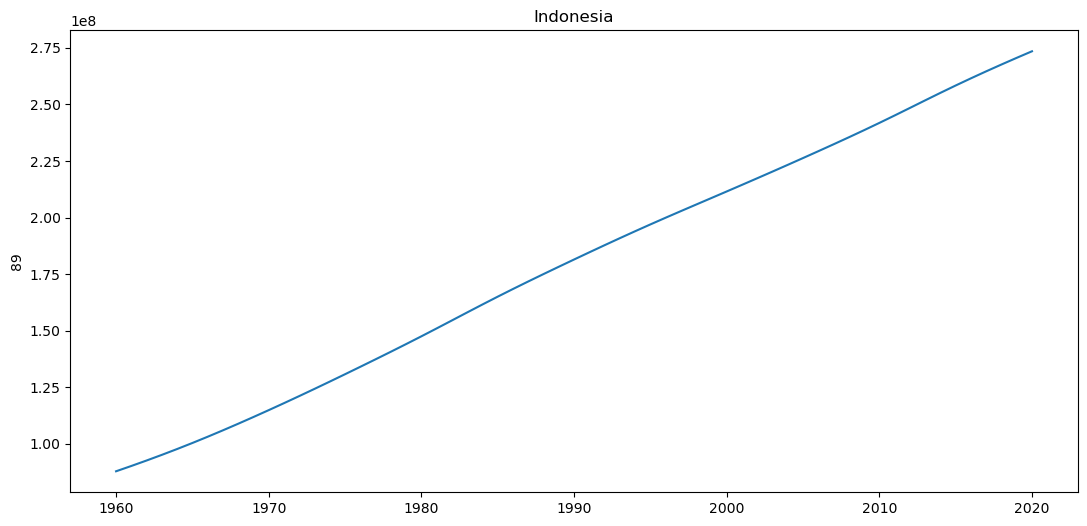

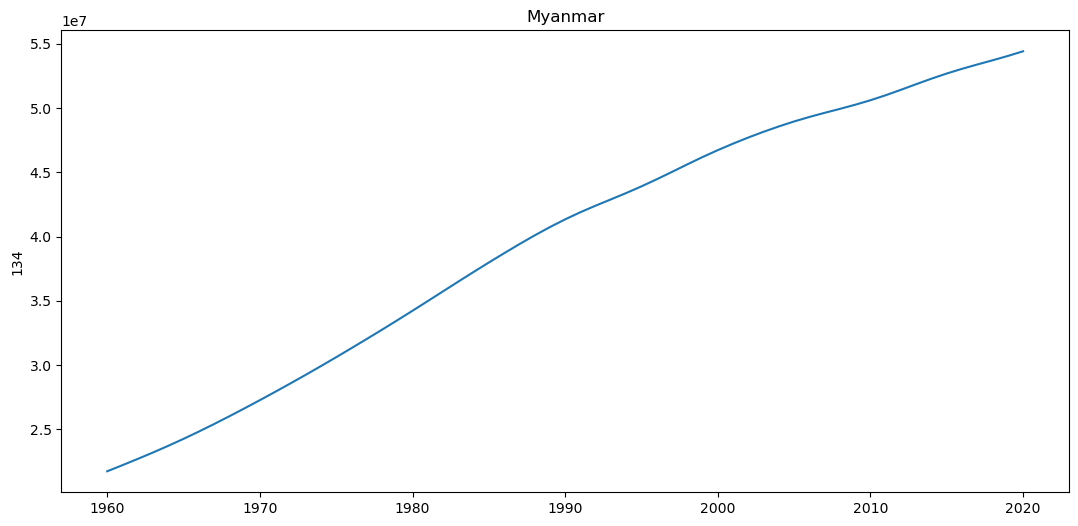

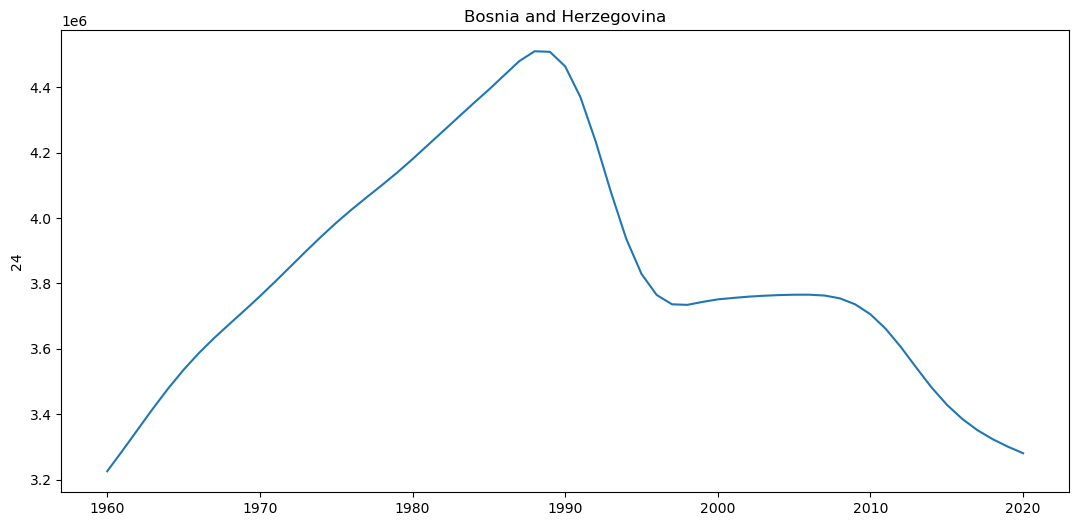

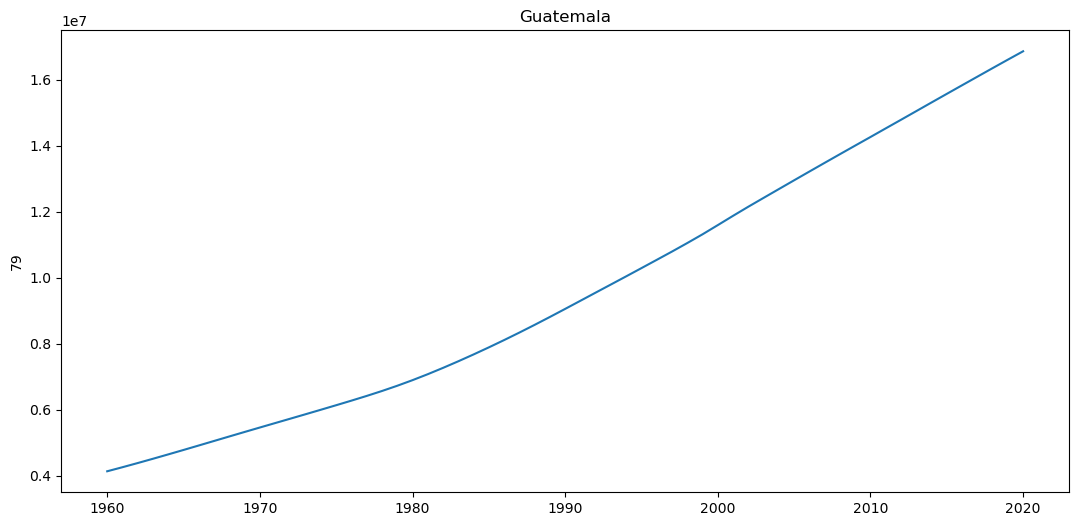

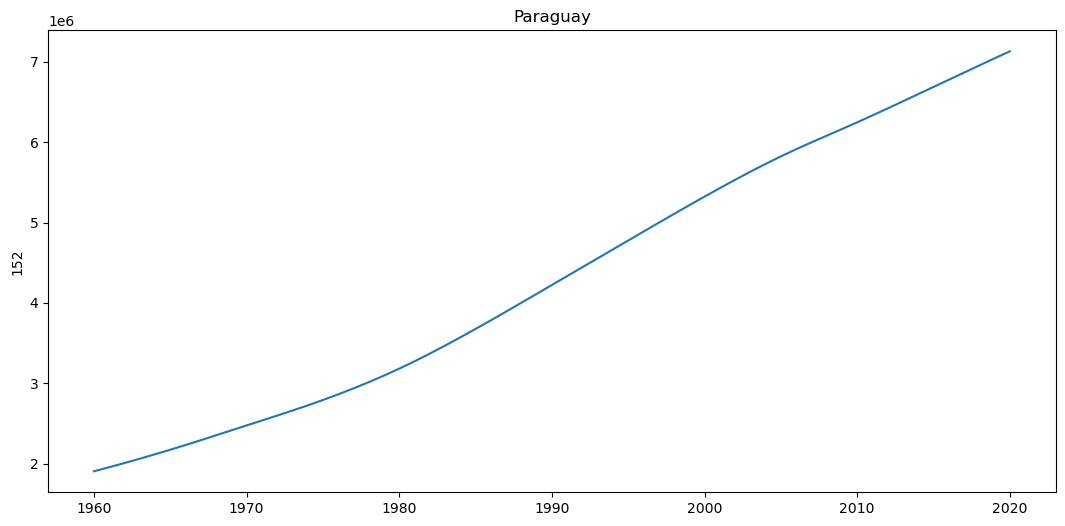

In [15]:
for cntry in an_ctry:
    plt.figure(figsize=(13, 6))
    plots = sns.lineplot(data=df.loc[cntry], x=[1960 + i for i in range(61)], y=df.loc[cntry][1:])
    plt.title(df.loc[cntry]['country'])

# Анализ численности населения для мира в целом

In [16]:
# Суммируем значения, чтобы получить население для мира в целом
# P.S. Стоит помнить, что есть пропущенные данные
df.loc[len(df.index)]= df.sum()
df = df.replace(df['country'][len(df.index) - 1], 'Total')

Text(0.5, 1.0, 'World')

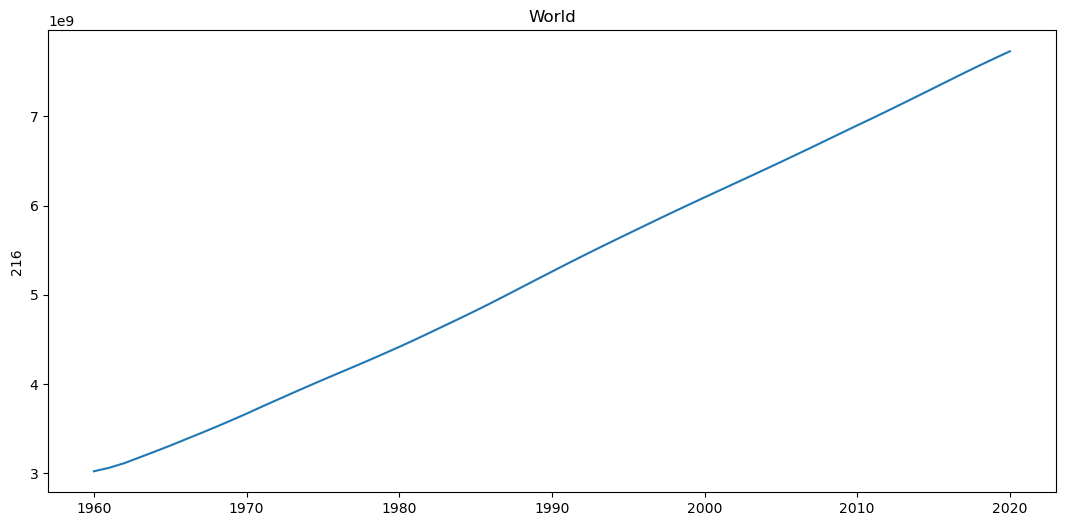

In [17]:
plt.figure(figsize=(13, 6))
plots = sns.lineplot(data=df.loc[len(df.index) - 1], x=[1960 + i for i in range(61)], y=df.loc[len(df.index) - 1][1:])
plt.title('World')